# Load libs and date

In [9]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from lib import *

In [10]:
# Initialize lists to store audio data and sample rates
rir = np.zeros((2, 7, 6), dtype=object) # room impluse response
sr = np.zeros((2, 7, 6), dtype=object) # sample rate

for i in range(1, 3):  # speaker
    for j in range(-3, 4):  # position
        for k in range(1, 7):  # microphone
            file_path = f'./data/IRs_valerio/pos_{j}_speaker_{i}/ir_pos_{j}_speaker_{i}_mic{k}.wav'
            rir[i-1, j+3, k-1], sr[i-1, j+3, k-1] = librosa.load(file_path, sr=None)

print('all done!')

all done!


In [11]:
sr = sr[0,0,0]
time = np.arange(0, len(rir[0,0,0])) / sr  # Assuming same length for all audio signals
print('sample:',time.size, 'time:', time.size/sr,'s','sample rate:',sr,'Hz')

sample: 960000 time: 5.0 s sample rate: 192000 Hz


# Plot the waveform

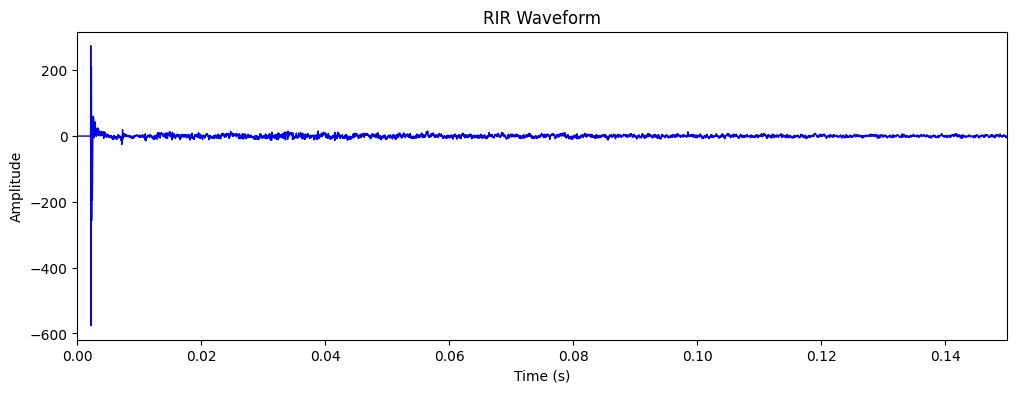

In [12]:
# Plot the waveform with a lighter line style
plt.figure(figsize=(12, 4))
plt.plot(time, rir[0,0,0], linewidth=1, color='b')  # Adjust line width and color
plt.title('RIR Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Set x-axis limits to focus on the beginning of the audio
plt.xlim(0, 0.15)  # Adjust the limits as needed
plt.savefig('./assets/rir_waveform.png', dpi=300, bbox_inches='tight')
plt.show()

## How to define the start of Direct Sound?

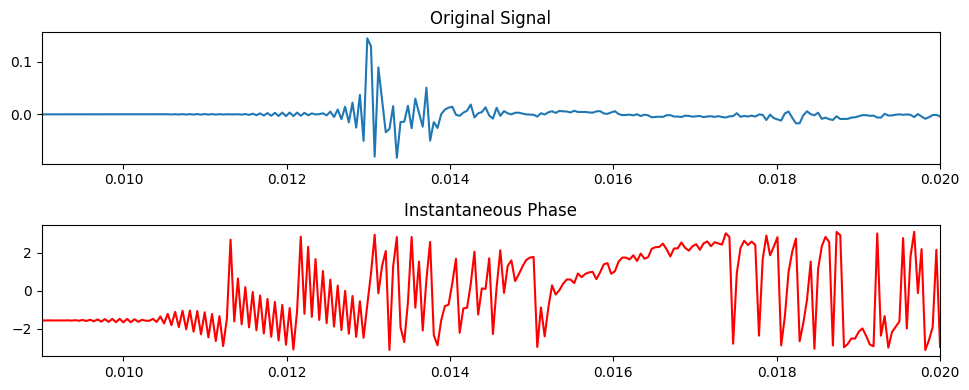

In [13]:
from scipy.signal import hilbert

filepath_1 = 'data\omni\s1_r1_o.wav'
signal_1, sr_1 = librosa.load(filepath_1,sr=22100)
time_1 = np.arange(len(signal_1)) / sr_1

# Calculate Hilbert Transform
analytic_signal = hilbert(signal_1)

# Extract phase information
instantaneous_phase = np.angle(analytic_signal)

# Plot original signal and instantaneous phase
plt.figure(figsize=(10, 4))

plt.subplot(2, 1, 1)
plt.plot(time_1, signal_1, label='Original Signal')
plt.title('Original Signal')

plt.xlim(0.009, 0.02)

plt.subplot(2, 1, 2)
plt.plot(time_1, instantaneous_phase, label='Instantaneous Phase', color='r')
plt.title('Instantaneous Phase')

plt.xlim(0.009, 0.02)

plt.tight_layout()
plt.savefig('./assets/phase.png', dpi=300, bbox_inches='tight')
plt.show()


## How to devide early reflections and late reflections?

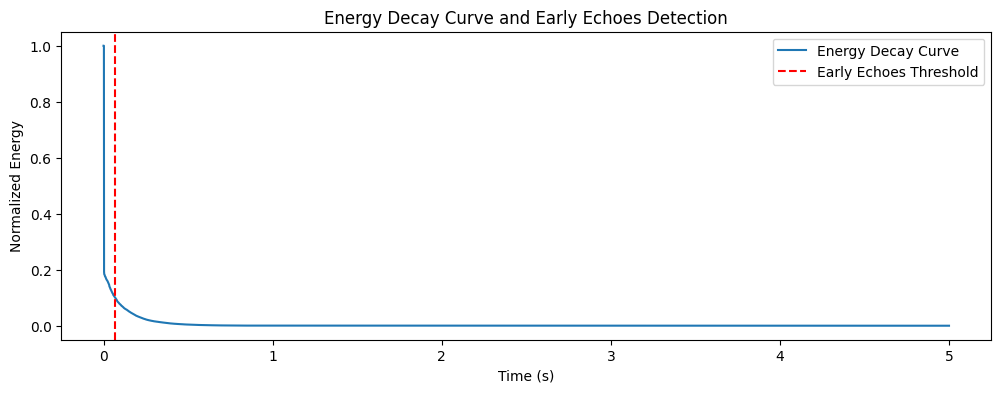

Early Echo Index: 13272
Early Echo Time: 0.069125 seconds


In [14]:
# audio_file_path = '/Users/yewentai/Downloads/JENNIE - SOLO (AUDIO).mp3'
early_echo_index, early_echo_time = edc_analyze(rir[0,0,0], sr, plot=True)

print(f'Early Echo Index: {early_echo_index}')
print(f'Early Echo Time: {early_echo_time} seconds')